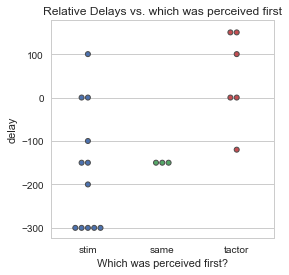

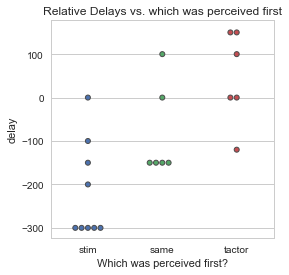

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import copy as copy

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline

delay = np.array([2700,2550,2500,2600,2700,2550,2700,2550,2550,2700,2800,2550,2400,2400,2800,2850,2400,2850,2400,2580,2400
         ])-2700

# felt first
# tactor = 0
# stim = 1 
# same = 2
firstFeel = np.array([1,2,1,1,0,2,0,1,1,1,0,2,1,1,1,0,1,0,1,0,1])

d = {'delay': delay, 'perception': firstFeel}
dataFrameInt = pd.DataFrame(data=d)
map_dict = {0: "tactor",1: "stim",2:"same"}
dataFrameInt["type"] = dataFrameInt["perception"].map(map_dict)
#dataFrameInt = pd.DataFrame(delay,firstFeel)

font = {'size'   : 34}

mpl.rc('font', **font)

plt.figure(figsize=(4,4))
#ax = sns.stripplot(x="type", y="delay", data=dataFrameInt,jitter=True,linewidth=1);
ax = sns.swarmplot(x="type", y="delay", data=dataFrameInt,linewidth=1);


plt.title('Relative Delays vs. which was perceived first')
ax.set_xlabel('Which was perceived first?')
plt.savefig('TOJ_a1355e_perceptionTimes.png',dpi=600)

######################

firstFeelMoreSame = copy.copy(firstFeel)

# any he said were hard to say but slight edge for stim go to same
firstFeelMoreSame[[8,9,14]] = 2



dSame = {'delay': delay, 'perception': firstFeelMoreSame}
dataFrameIntSame = pd.DataFrame(data=dSame)
map_dict = {0: "tactor",1: "stim",2:"same"}
dataFrameIntSame["type"] = dataFrameIntSame["perception"].map(map_dict)
#dataFrameInt = pd.DataFrame(delay,firstFeel)

font = {'size'   : 34}

mpl.rc('font', **font)

plt.figure(figsize=(4,4))
#ax = sns.stripplot(x="type", y="delay", data=dataFrameInt,jitter=True,linewidth=1);
ax = sns.swarmplot(x="type", y="delay", data=dataFrameIntSame,linewidth=1);


plt.title('Relative Delays vs. which was perceived first')
ax.set_xlabel('Which was perceived first?')
plt.savefig('TOJ_a1355e_perceptionTimes_moreSame.png',dpi=600)





In [7]:
firstFeelMoreSame

array([1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 1])